###Experiment 1


Name - Khushi Jashnani

UID - 2018130017

###**Objective**: To carry out linear and logistic regression and build a regression model using Python Platform

#### **Case studies to consider** :

1) Predict a car's fuel economy from its physical parameters such as weight and engine size and power (Part 1A)

2) Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with colic will live or die (Part 1B)


#### **Outcomes** :

1. To learn how to define, fit, and use a model in Python

2. To interpret the results

#### Part 1A - Auto - Miles per gallon (MPG) prediction

In [1]:
# importing the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Connecting/Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Colab Notebooks/DS/Labs/Exp1

/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp1


In [4]:
%cd Auto-mpg

/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp1/Auto-mpg


1. Load the dataset (Use pandas )

In [5]:
# Reading the training dataset
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
# Renaming the following mispelled brands into proper names
auto_misspelled = {'chevroelt': 'chevrolet',
                   'chevy': 'chevrolet',
                   'vokswagen': 'volkswagen',
                   'vw': 'volkswagen',
                   'hi': 'harvester',
                   'maxda': 'mazda',
                   'toyouta': 'toyota',
                   'mercedes-benz': 'mercedes'}

# Spliting the car name into brand and name columns respectively
data['brand'] = [auto_misspelled[key].title() if key in auto_misspelled else \
               key.title() for key in [i.split()[0] for i in data['car name']]]

data['name'] = [' '.join(i.split()[1:]).title() for i in data['car name']]
data = data.drop(columns = 'car name', axis = 0)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130,3504,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165,3693,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150,3433,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140,3449,10.5,70,1,Ford,Torino


2. and 3. Exploratory Data Analysis of the dataset and Data Preprocessing (Handling NA values)

In [7]:
# Checking the shape of the dataset
data.shape

(398, 10)

In [8]:
# Check for null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
brand           0
name            0
dtype: int64

In [9]:
# Checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   brand         398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 31.2+ KB


In [10]:
data.describe()  

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
# Classifying the features as discrete and continuous features
discrete_columns = []
continuous_columns = []
for x in data.columns :
    if data[x].nunique() < 10 or x in ["name", "brand"]:
        discrete_columns.append(x)
    else:
        continuous_columns.append(x)
print("Discrete columns : ", discrete_columns)
print("Continuous columns : ", continuous_columns)

Discrete columns :  ['cylinders', 'origin', 'brand', 'name']
Continuous columns :  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


In [12]:
# Checking frequency of unqiue values in each column
for col in discrete_columns:
    print("Unique values in ", col," - ",data[col].nunique())

Unique values in  cylinders  -  5
Unique values in  origin  -  3
Unique values in  brand  -  30
Unique values in  name  -  300


The first three seem good for a categorical column but the name has too many classes which for approximately every new instance, so we can drop it in the end

In [13]:
# Checking for unqiue values in each column
for col in discrete_columns:
    print(data[col].value_counts())

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
1    249
3     79
2     70
Name: origin, dtype: int64
Ford          51
Chevrolet     47
Plymouth      31
Amc           28
Dodge         28
Toyota        26
Datsun        23
Volkswagen    22
Buick         17
Pontiac       16
Honda         13
Mazda         12
Mercury       11
Oldsmobile    10
Fiat           8
Peugeot        8
Audi           7
Volvo          6
Chrysler       6
Renault        5
Saab           4
Opel           4
Subaru         4
Mercedes       3
Cadillac       2
Bmw            2
Capri          1
Harvester      1
Triumph        1
Nissan         1
Name: brand, dtype: int64
Pinto         6
Rabbit        5
Maverick      5
Corolla       5
Matador       5
             ..
Monza 2+2     1
Mustang Ii    1
Astro         1
Pacer         1
S-10          1
Name: name, Length: 300, dtype: int64


In [14]:
# Checking the continuous variables
data[continuous_columns]

,mpg,displacement,horsepower,weight,acceleration,model year
0,18.0,307.0,130,3504,12.0,70
1,15.0,350.0,165,3693,11.5,70
2,18.0,318.0,150,3436,11.0,70
3,16.0,304.0,150,3433,12.0,70
4,17.0,302.0,140,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6,82
394,44.0,97.0,52,2130,24.6,82
395,32.0,135.0,84,2295,11.6,82
396,28.0,120.0,79,2625,18.6,82


We see a few ? in the column of horse power.

Let's see in detail

In [15]:
# Checking the frequency of unique values in horsepower column
data[data['horsepower'] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
32,25.0,4,98.0,?,2046,19.0,71,1,Ford,Pinto
126,21.0,6,200.0,?,2875,17.0,74,1,Ford,Maverick
330,40.9,4,85.0,?,1835,17.3,80,2,Renault,Lecar Deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,Ford,Mustang Cobra
354,34.5,4,100.0,?,2320,15.8,81,2,Renault,18I
374,23.0,4,151.0,?,3035,20.5,82,1,Amc,Concord Dl


So there are 6 instances with ? in the horsepower column

In [16]:
# Imputing the missing values in it with 0
data.loc[data['horsepower'] == "?", 'horsepower'] = 0

In [17]:
data['horsepower'].value_counts().to_frame()

,horsepower
150,22
90,20
88,19
110,18
100,17
...,...
61,1
93,1
148,1
152,1


In [18]:
# Converting the type of horsepower column from object to numeric i.e float
data.loc[:, 'horsepower'] = pd.to_numeric(data.loc[:, 'horsepower'])

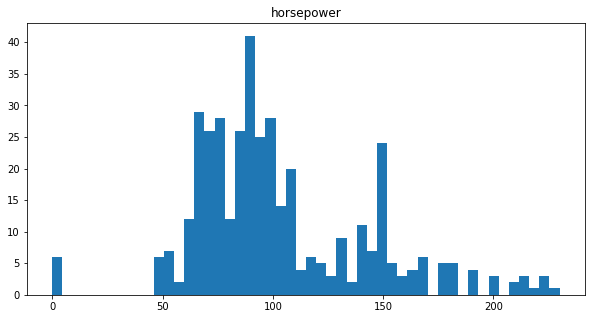

In [19]:
# Seeing the distribution of continuous column
plt.figure(figsize=(10,5))
plt.hist(data['horsepower'], bins=50)
plt.title('horsepower')
plt.show()

But this is forming an outlier, so lets impute it with an median

In [20]:
# Calculating the median value
pd.to_numeric(data.loc[data['horsepower'] != 0, 'horsepower']).median()

93.5

Inputing the horse power column with the median

In [21]:
data.loc[data['horsepower'] == 0, 'horsepower'] = pd.to_numeric(data.loc[data['horsepower'] != 0, 'horsepower']).median()

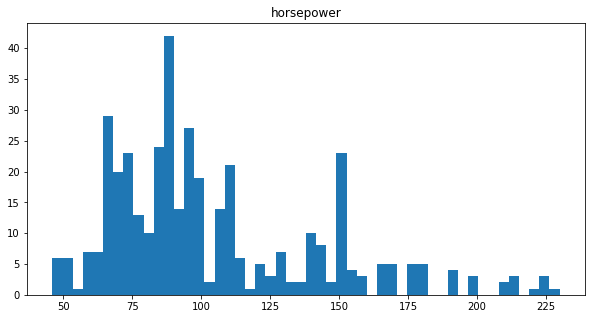

In [22]:
plt.figure(figsize=(10,5))
plt.hist(data['horsepower'], bins=50)
plt.title('horsepower')
plt.show()

In [23]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,Ford,Torino


Now, lets check for some outliers in continuous columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


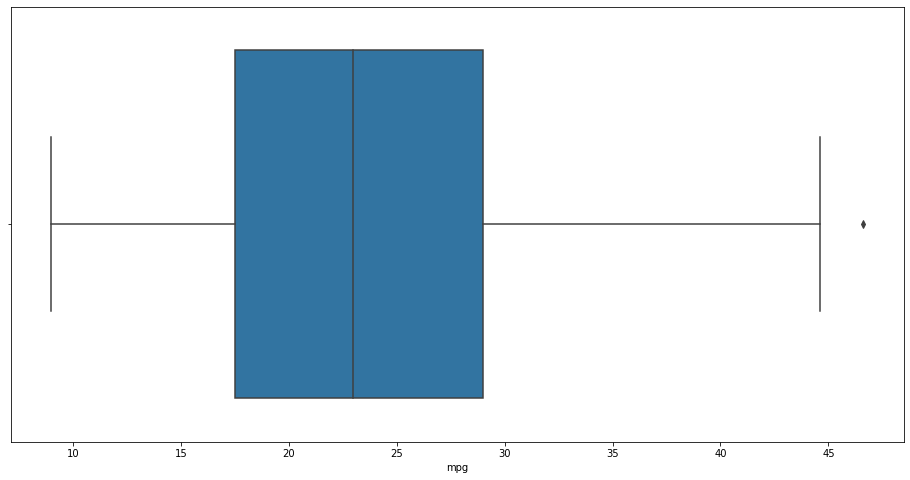

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


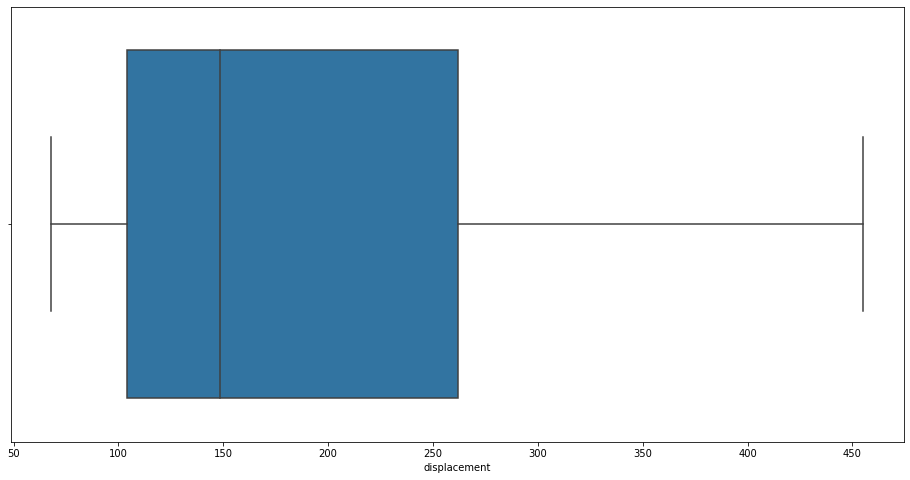

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


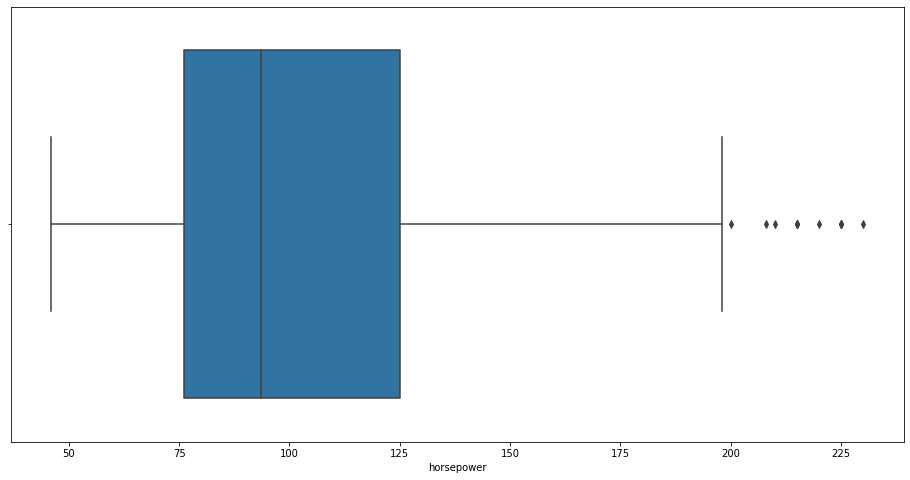

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


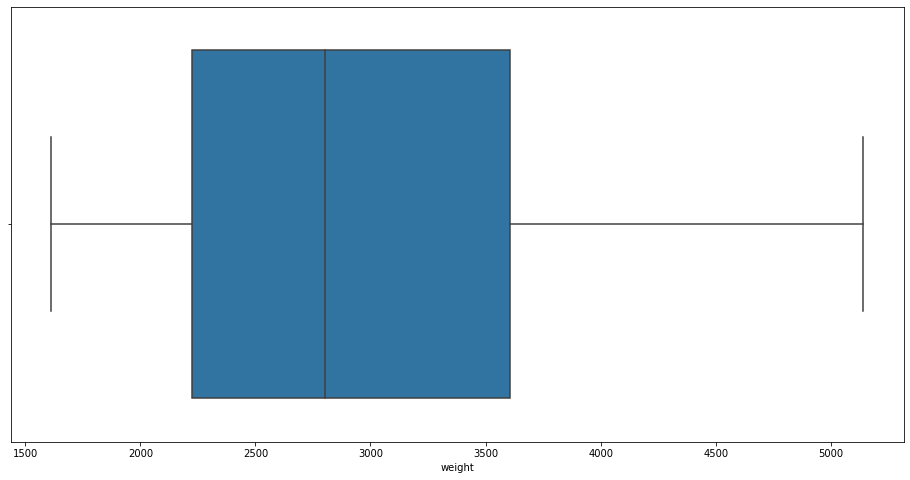

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


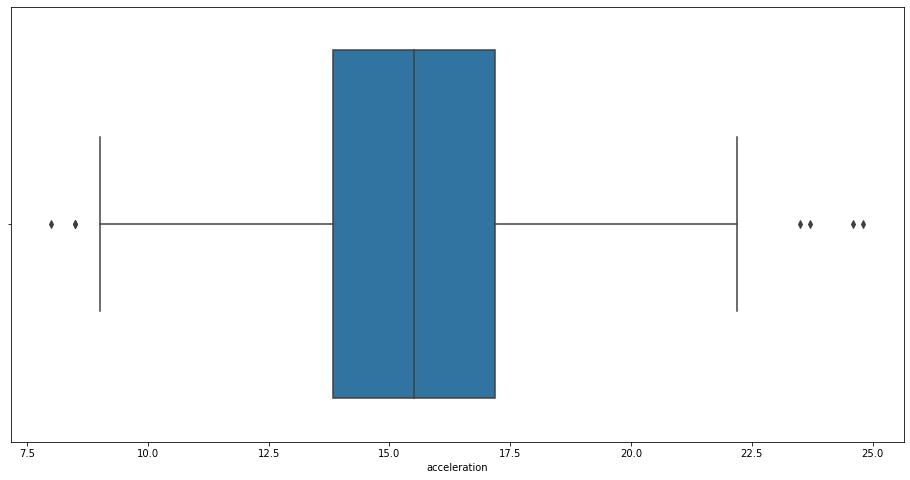

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


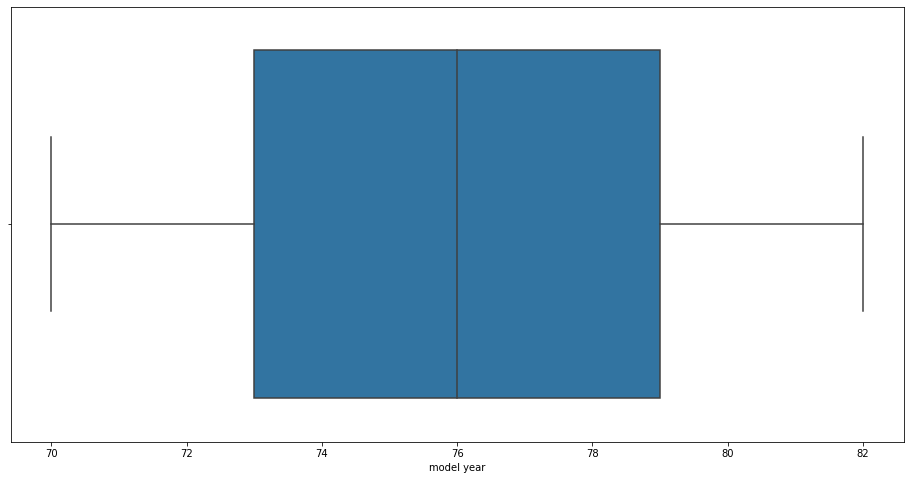

In [24]:
# Checking for outliers in these columns by plotting the boxplot
for x in continuous_columns:
    plt.figure(figsize=(16,8))
    sns.boxplot(data[x])
    plt.show()

Here, we see that apart from model year, every column is a continuous column

Let's check their histograms

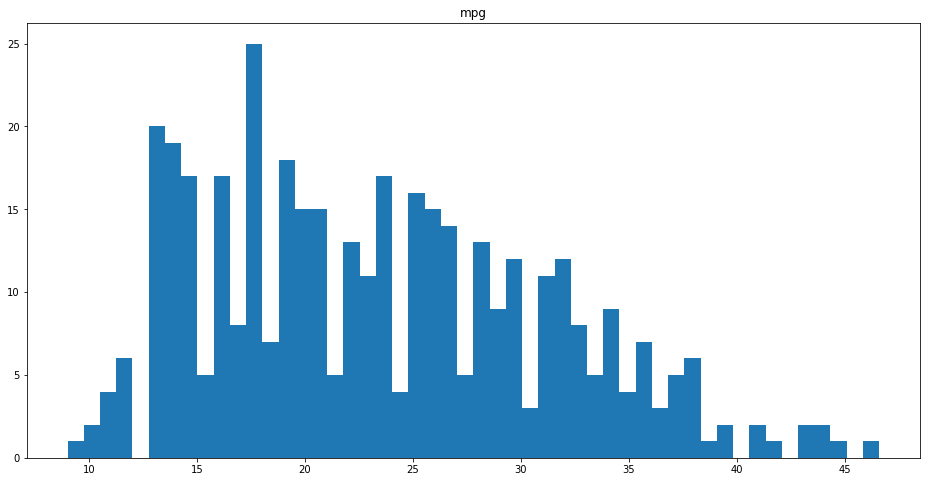

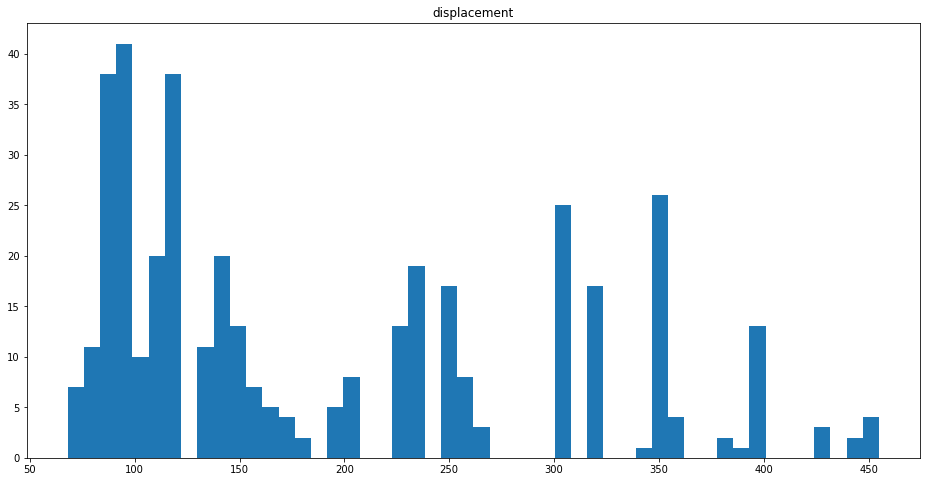

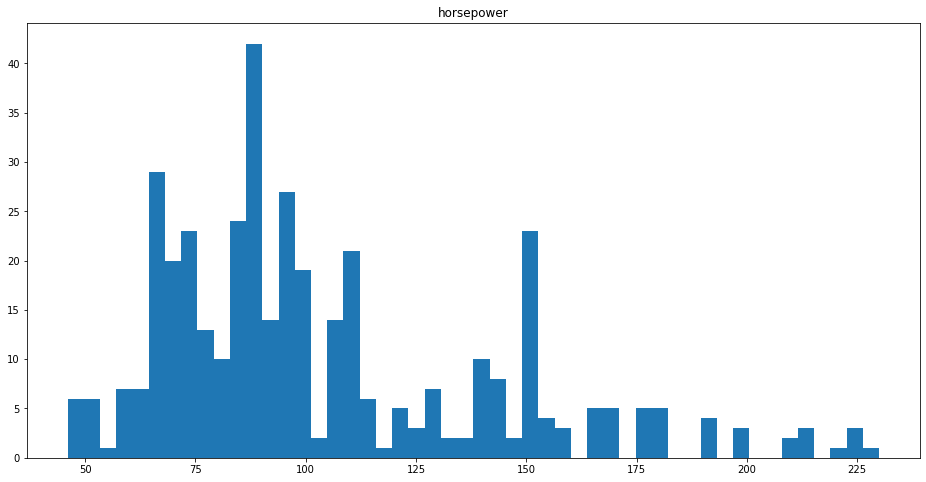

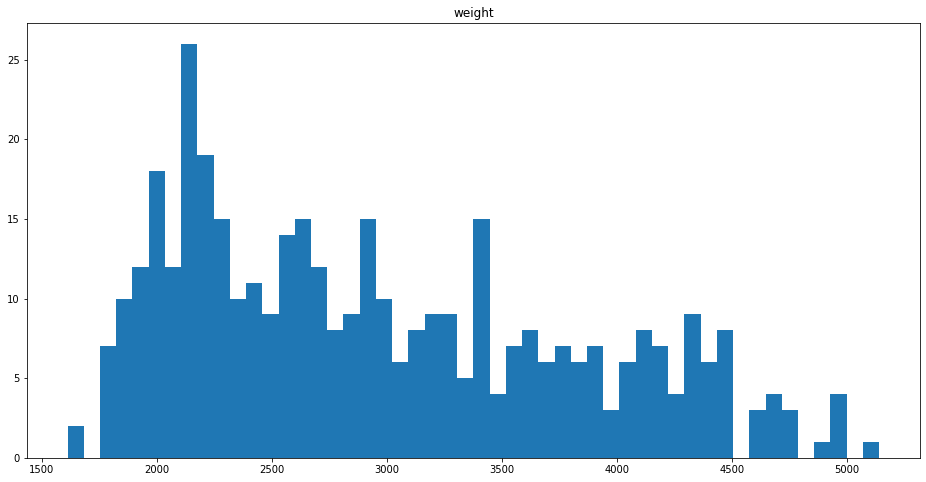

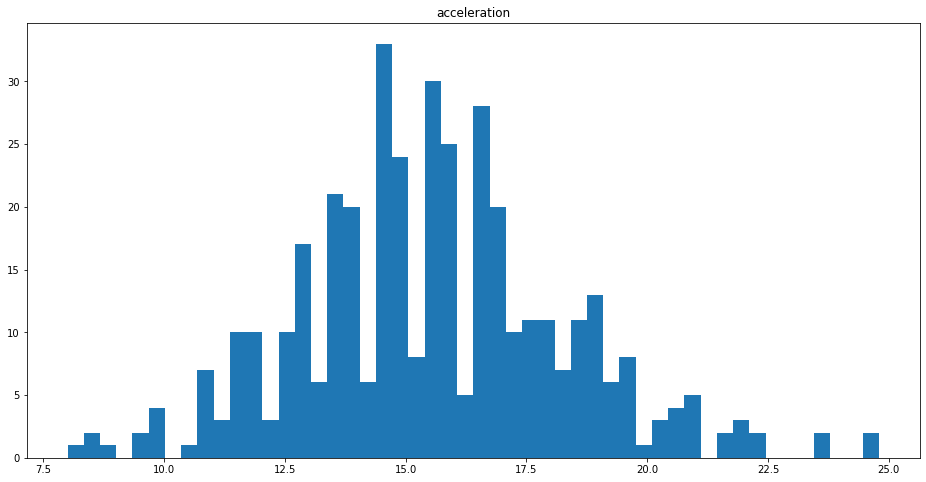

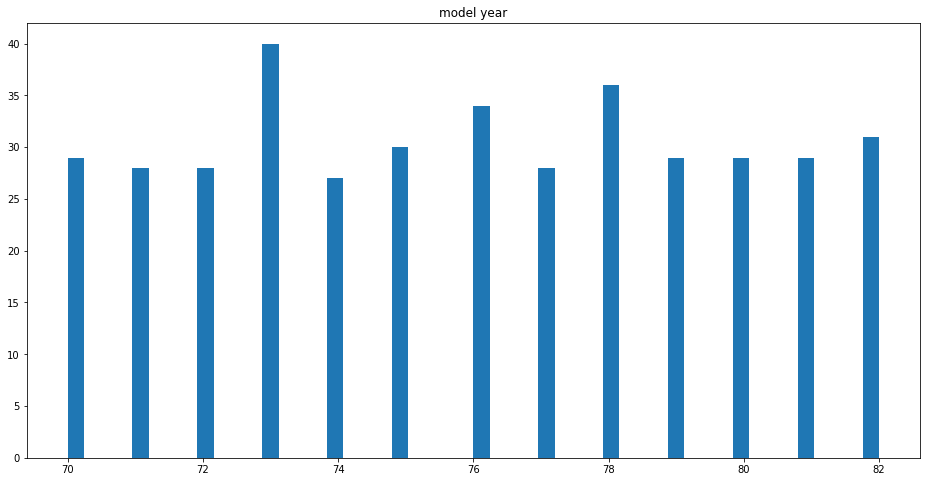

In [25]:
# Checking for outliers in these columns by plotting the boxplot
for x in continuous_columns:
    plt.figure(figsize=(16,8))
    plt.hist(data[x], bins=50, label=x)
    plt.title(x)
    plt.show()

Here, we can see that model year is also a discrete column with only 13 values

In [26]:
continuous_columns

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

In [27]:
# Lets remove it from continuous 
continuous_columns.remove('model year')
continuous_columns

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

In [28]:
# Adding it to discrete
discrete_columns.append('model year')
discrete_columns

['cylinders', 'origin', 'brand', 'name', 'model year']

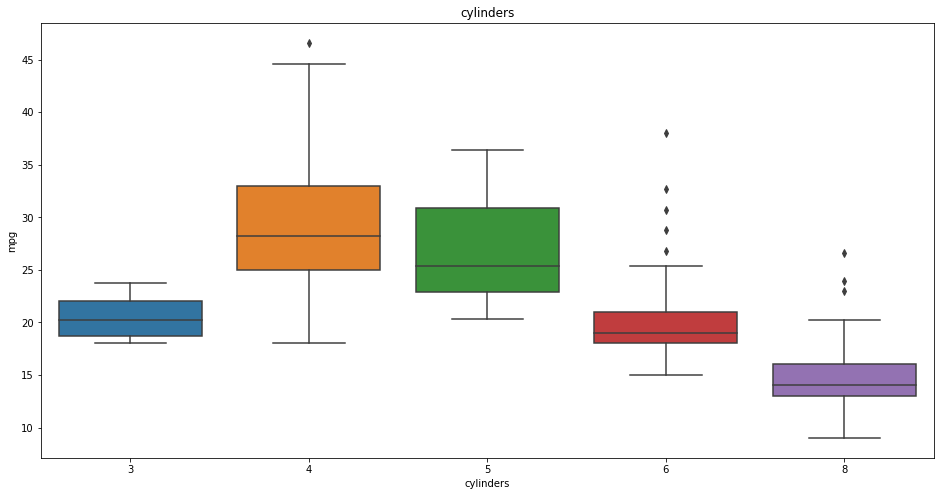

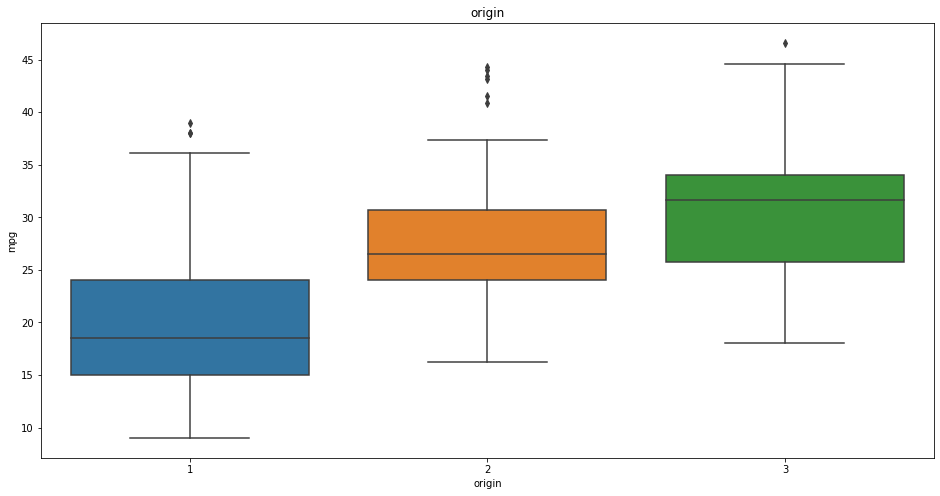

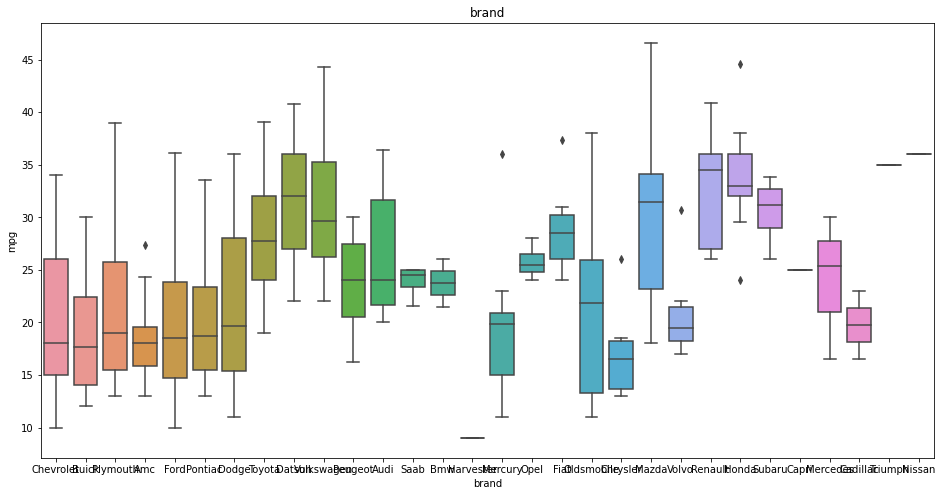

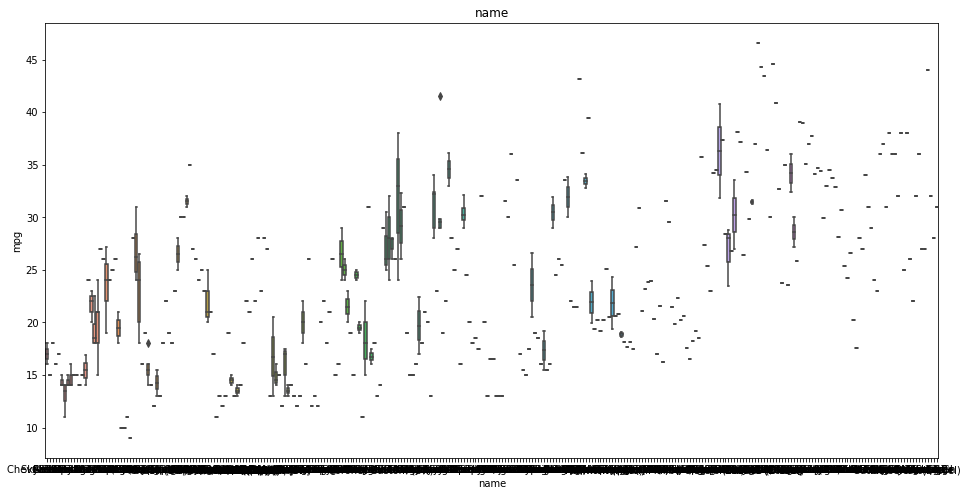

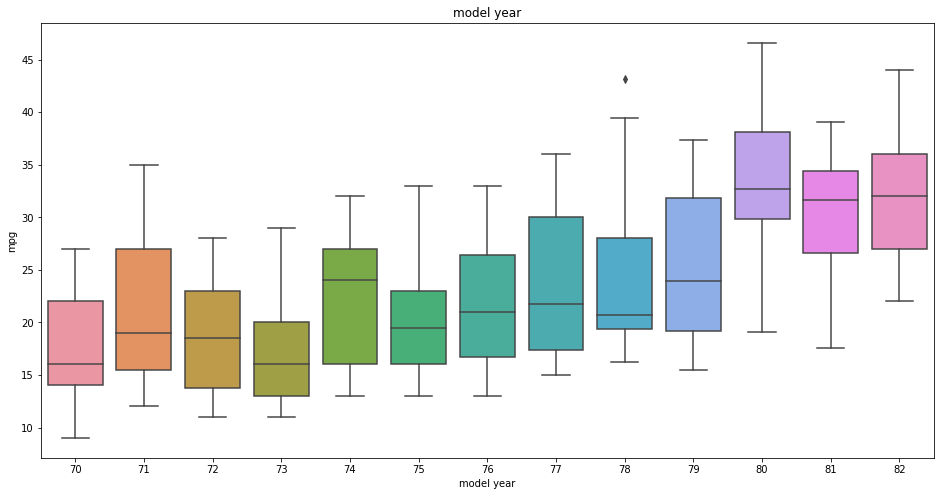

In [29]:
# Checking the influence of labels in the categorical columns/discrete columns
for x in discrete_columns:
    plt.figure(figsize=(16,8))
    sns.boxplot(x=data[x], y=data['mpg'])
    plt.title(x)
    plt.show()

In [30]:
data = data.drop(['name'], axis=1)
discrete_columns.remove("name")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,Chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,Buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,Plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,Amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,Ford


In [31]:
print("Continuous columns :",continuous_columns)
print("Discrete columns :",discrete_columns)

Continuous columns : ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
Discrete columns : ['cylinders', 'origin', 'brand', 'model year']


#### Removing the outliers for continuous columns

In [32]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1 = q1, q3 = q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    return dataframe
    
for col in continuous_columns:
    data = replace_with_thresholds(data, col, q1 = 0.1, q3 = 0.9)

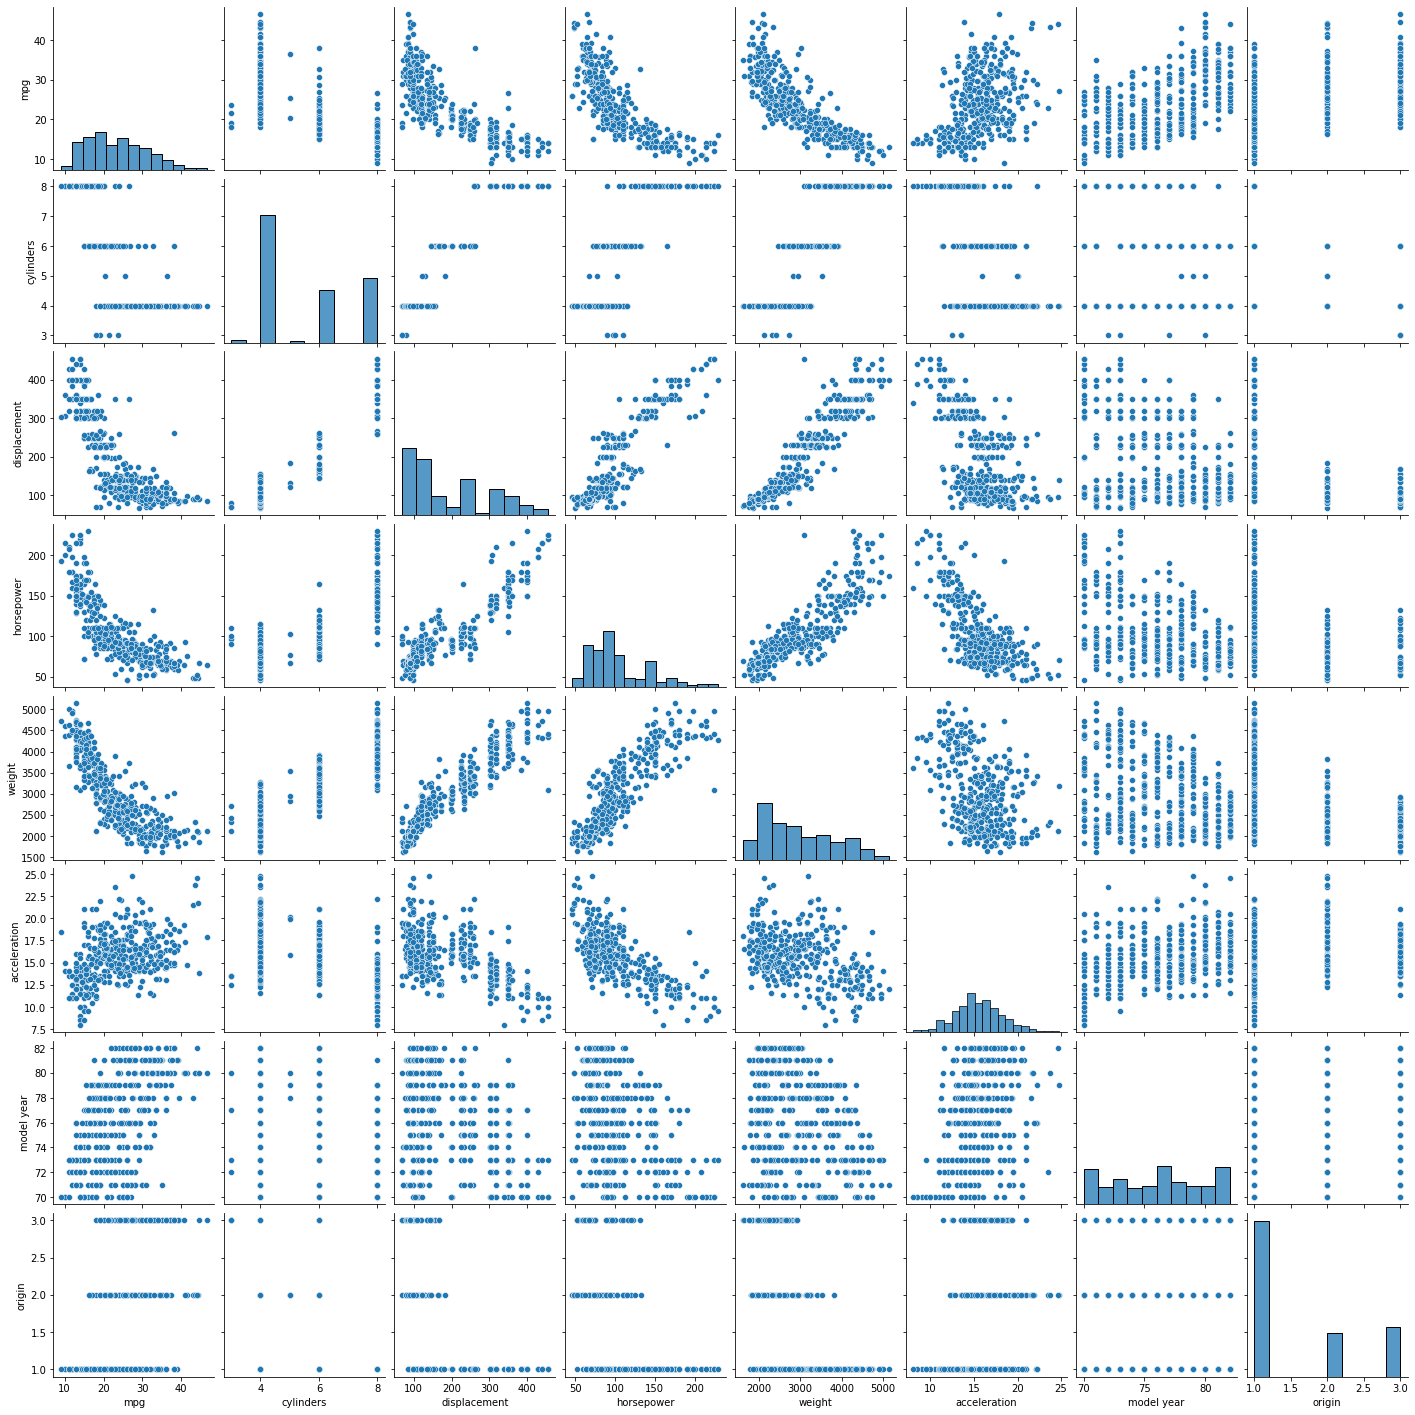

In [33]:
sns.pairplot(data)

#### Transforming the features by converting the categorical columns into one hot vectors

In [34]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe,
                               columns = categorical_cols,
                               drop_first = drop_first)
    return dataframe


ohe_cols = discrete_columns
print('Multiclass Variables: {}'.format(ohe_cols))
data = one_hot_encoder(data, ohe_cols)

Multiclass Variables: ['cylinders', 'origin', 'brand', 'model year']


In [35]:
data.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,brand_Amc,brand_Audi,brand_Bmw,brand_Buick,brand_Cadillac,brand_Capri,brand_Chevrolet,brand_Chrysler,brand_Datsun,brand_Dodge,brand_Fiat,brand_Ford,brand_Harvester,brand_Honda,brand_Mazda,brand_Mercedes,brand_Mercury,brand_Nissan,brand_Oldsmobile,brand_Opel,brand_Peugeot,brand_Plymouth,brand_Pontiac,brand_Renault,brand_Saab,brand_Subaru,brand_Toyota,brand_Triumph,brand_Volkswagen,brand_Volvo,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,18.0,307.0,130.0,3504.0,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
data.shape

(398, 56)

#### Understanding the correlation between features

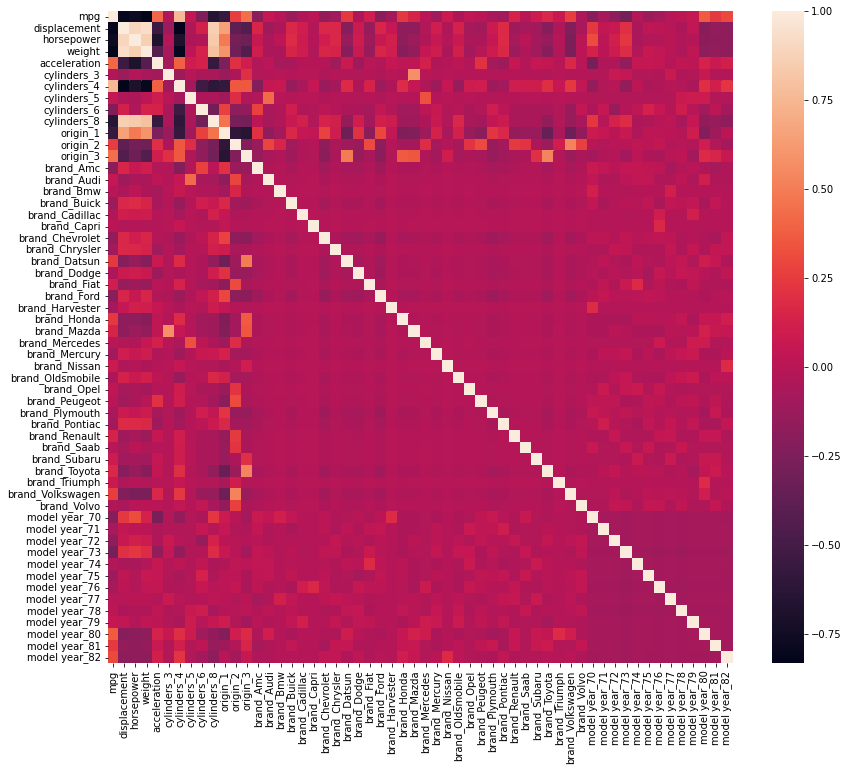

In [37]:
corr = data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr)

#### Defining the independent and dependent variables for the model

In [144]:
y = data['mpg']
X = data.drop(['mpg'], axis=1)

In [145]:
X.shape

(398, 55)

In [146]:
X.head()

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,brand_Amc,brand_Audi,brand_Bmw,brand_Buick,brand_Cadillac,brand_Capri,brand_Chevrolet,brand_Chrysler,brand_Datsun,brand_Dodge,brand_Fiat,brand_Ford,brand_Harvester,brand_Honda,brand_Mazda,brand_Mercedes,brand_Mercury,brand_Nissan,brand_Oldsmobile,brand_Opel,brand_Peugeot,brand_Plymouth,brand_Pontiac,brand_Renault,brand_Saab,brand_Subaru,brand_Toyota,brand_Triumph,brand_Volkswagen,brand_Volvo,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,307.0,130.0,3504.0,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,350.0,165.0,3693.0,11.5,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,318.0,150.0,3436.0,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,304.0,150.0,3433.0,12.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,302.0,140.0,3449.0,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

4. Data Partition (80% for training and 20% for testing)

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Splitting the dataset into train test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)


5. Build the model

In [149]:
# Applying linear regression to the target variable
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

6. Prediction

In [150]:
# Predicting the X_test
pred = linear.predict(X_test)
actual = y_test

In [151]:
linear.score(X_test, y_test)

0.8187197347988667

7. Evaluate the model

In [153]:
print("Metrics to evaluate Regression model are :")
mae = mean_absolute_error(actual, pred)
print("Linear Regression MAE:", mae)
mse = mean_squared_error(actual, pred)
print("Linear Regression MSE:", mse)
print("Linear Regression RMSE:", np.sqrt(mse))
print("LR Coef:", linear.coef_)

Metrics to evaluate Regression model are :
Linear Regression MAE: 2.5215395939054943
Linear Regression MSE: 10.293730839532794
Linear Regression RMSE: 3.2083844594332507
LR Coef: [ 4.09192917e-03 -5.67437140e-02 -4.63058674e-03 -1.08994907e-01
 -6.16893275e+00  1.40776525e+00  2.78897044e+00 -2.51245700e-01
  2.22344277e+00 -9.07540337e-01  1.28282615e-01  7.79257722e-01
 -1.45374080e+00 -1.79676646e+00 -1.42220197e+00  7.61123595e-01
  3.36614914e+00  4.80769866e-01 -4.29600688e-01 -5.66122545e+00
  1.28220070e+00 -2.90504112e-01  1.35308373e+00 -1.56068030e+00
  4.55613027e-01 -5.70604348e-02  1.57094994e+00 -4.76904152e-01
 -1.68846732e+00  1.92901251e-15  2.76626167e+00 -9.97840125e-01
  3.94409131e-02  7.44311293e-01  1.60244976e+00  1.84132654e+00
 -3.46011953e-01 -1.53536230e+00 -4.81470172e-01  1.16601818e+00
  6.89425423e-01  7.87124854e-02 -2.66872390e+00 -1.62547696e+00
 -3.05745372e+00 -3.67919129e+00 -1.76358173e+00 -2.21573498e+00
 -1.33269097e+00 -3.19821101e-01  1.06925

###Horse Colic Life Prediction

In [47]:
%cd ..
%cd Horse\ Colic\ Life\ Prediction

/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp1
/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp1/Horse Colic Life Prediction


In [48]:
%ls

datadict.txt  horse.csv


1. Load the dataset

In [208]:
horse_data = pd.read_csv('horse.csv')
horse_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [209]:
horse_data.shape

(299, 28)

2. Data Preprocessing (Handling NA values)

In [210]:
horse_data.dtypes.value_counts() # Checking the number of columns having different datatype

object     17
float64     7
int64       4
dtype: int64

In [211]:
horse_data.isnull().sum() # Checking if there are any null values

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [212]:
null_per = (horse_data.isnull().sum().sum() / (horse_data.shape[0]*horse_data.shape[1]))*100
null_per
# Percentage of null values in the dataset

19.13521261347348

([<matplotlib.axis.XTick at 0x7f949ae453d0>,
 [Text(0, 0, 'surgery'),
  Text(0, 0, 'age'),
  Text(0, 0, 'hospital_number'),
  Text(0, 0, 'rectal_temp'),
  Text(0, 0, 'pulse'),
  Text(0, 0, 'respiratory_rate'),
  Text(0, 0, 'temp_of_extremities'),
  Text(0, 0, 'peripheral_pulse'),
  Text(0, 0, 'mucous_membrane'),
  Text(0, 0, 'capillary_refill_time'),
  Text(0, 0, 'pain'),
  Text(0, 0, 'peristalsis'),
  Text(0, 0, 'abdominal_distention'),
  Text(0, 0, 'nasogastric_tube'),
  Text(0, 0, 'nasogastric_reflux'),
  Text(0, 0, 'nasogastric_reflux_ph'),
  Text(0, 0, 'rectal_exam_feces'),
  Text(0, 0, 'abdomen'),
  Text(0, 0, 'packed_cell_volume'),
  Text(0, 0, 'total_protein'),
  Text(0, 0, 'abdomo_appearance'),
  Text(0, 0, 'abdomo_protein'),
  Text(0, 0, 'outcome'),
  Text(0, 0, 'surgical_lesion'),
  Text(0, 0, 'lesion_1'),
  Text(0, 0, 'lesion_2'),
  Text(0, 0, 'lesion_3'),
  Text(0, 0, 'cp_data')])

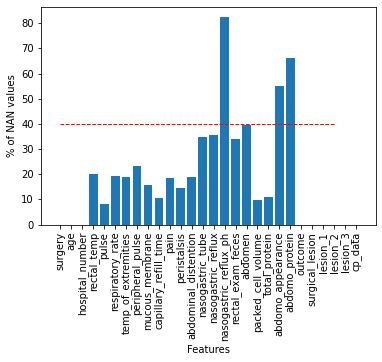

In [213]:
nan_per = horse_data.isna().sum()/len(horse_data)*100
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40,40], 'r--', lw=1)
plt.xticks(list(range(len(horse_data.columns))),list(horse_data.columns.values),rotation='vertical')

In [214]:
# Dropping the columns which are more than 40% empty and imputing the rest
from pandas.core.arrays.sparse import dtype
columns_to_be_dropped = []
for col in horse_data.columns:
    if horse_data[col].isnull().sum()/horse_data.shape[0] > 0.4:
        columns_to_be_dropped.append(col)
    elif horse_data[col].dtype == 'object':
        horse_data.loc[:,col] = horse_data.loc[:,col].fillna(horse_data[col].mode()[0])
    else:
        horse_data.loc[:,col] = horse_data.loc[:,col].fillna(horse_data[col].median())


In [215]:
horse_data.drop(columns_to_be_dropped, axis=1, inplace=True)

3. Exploratory Data Analysis

In [216]:
horse_data.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [217]:
cat_columns=[]
num_columns=[]
for col in horse_data.columns:
    if horse_data[col].dtype=='object':
        cat_columns.append(col)
    else:
        num_columns.append(col)
print(len(cat_columns)," Categorical Columns are \n",cat_columns,'\n')
print(len(num_columns),"Numeric columns are \n",num_columns)

16  Categorical Columns are 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'outcome', 'surgical_lesion', 'cp_data'] 

9 Numeric columns are 
 ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [218]:
# Checking the percentage of labels in the dependent variable
horse_data['outcome'].value_counts()/horse_data.shape[0]

lived         0.595318
died          0.257525
euthanized    0.147157
Name: outcome, dtype: float64

In [219]:
# Checking the if there is any significant class imabalance within the categorical columns wrt the target variable
for col in horse_data.columns:
    if horse_data[col].dtype == 'object':
        print(pd.crosstab(horse_data[col], horse_data['outcome'], normalize='index'))

outcome      died  euthanized     lived
surgery                                
no       0.159664    0.142857  0.697479
yes      0.322222    0.150000  0.527778
outcome      died  euthanized     lived
age                                    
adult    0.240000    0.156364  0.603636
young    0.458333    0.041667  0.500000
outcome                  died  euthanized     lived
temp_of_extremities                                
cold                 0.333333    0.259259  0.407407
cool                 0.329268    0.195122  0.475610
normal               0.141026    0.051282  0.807692
warm                 0.100000    0.033333  0.866667
outcome               died  euthanized     lived
peripheral_pulse                                
absent            0.375000    0.500000  0.125000
increased         0.000000    0.400000  0.600000
normal            0.174863    0.103825  0.721311
reduced           0.407767    0.184466  0.407767
outcome              died  euthanized     lived
mucous_membrane           

In [220]:
# printing the numeric columns
for col in horse_data.columns:
    if horse_data[col].dtype != 'object':
        print(col)

hospital_number
rectal_temp
pulse
respiratory_rate
packed_cell_volume
total_protein
lesion_1
lesion_2
lesion_3


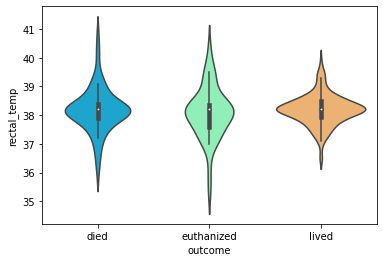

In [221]:
sns.violinplot(x="outcome", y='rectal_temp', data = horse_data, palette='rainbow')
# normal temp is 37.8
# may start out normal, then become elevated because of the lesion

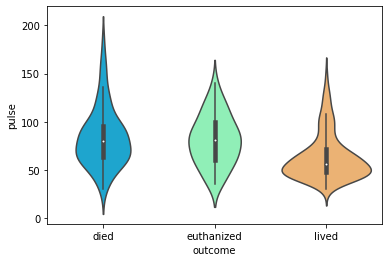

In [222]:
sns.violinplot(x="outcome", y='pulse', data = horse_data, palette='rainbow')
# 30 - 40 is normal for adults 
# rare to have a lower than normal rate although athletic horses may have a rate of 20-25 
# nimals with painful lesions or suffering from circulatory shock may have an elevated heart rate 

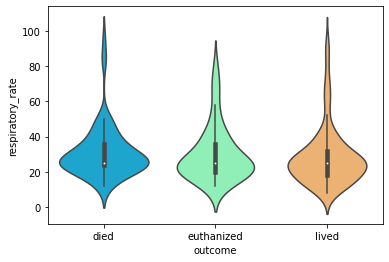

In [223]:
sns.violinplot(x="outcome", y='respiratory_rate', data = horse_data, palette='rainbow')
# normal rate is 8 to 10
# usefulness is doubtful due to the great fluctuations 

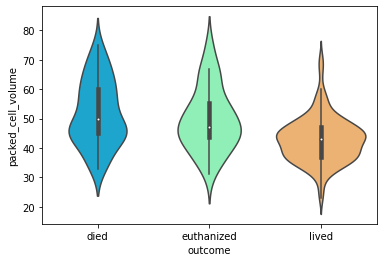

In [224]:
sns.violinplot(x="outcome", y='packed_cell_volume', data = horse_data, palette='rainbow')
# normal range is 30 - 50.
# increasing levels may indicate compromised circulation

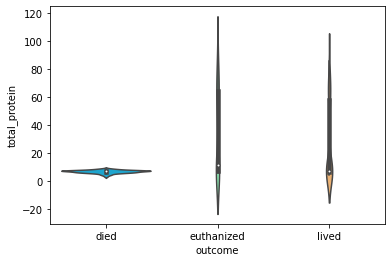

In [225]:
sns.violinplot(x="outcome", y='total_protein', data = horse_data, palette='rainbow')
# normal values lie in the 6-7.5 (gms/dL) range
# the higher the value the greater the dehydration

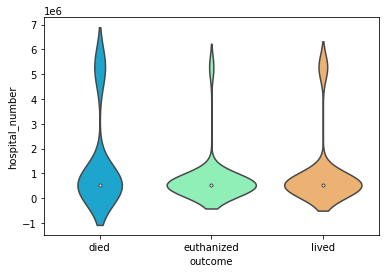

In [226]:
sns.violinplot(x="outcome", y='hospital_number', data = horse_data, palette='rainbow')

In [227]:
horse_data['outcome']=horse_data['outcome'].astype('category').cat.codes

In [228]:
# Apply label encoding to the categorical columns
for col in cat_columns:
    horse_data[col]=horse_data[col].astype('category').cat.codes

In [229]:
horse_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,2,0,2,2,2,1,0,45.0,8.4,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,3,0,3,2,2,0,4,50.0,85.0,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,3,2,1,2,2,3,3,33.0,6.7,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,1,0,2,0,0,1,0,48.0,7.2,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,1,2,2,2,3,2,1,2,2,0,0,74.0,7.4,0,0,4300,0,0,0


Correlation of mentioned features wrt outcome in ascending order
outcome                  1.000000
packed_cell_volume       0.398371
pulse                    0.335550
surgical_lesion          0.332933
temp_of_extremities      0.290367
total_protein            0.265889
capillary_refill_time    0.256294
abdomen                  0.214875
rectal_exam_feces        0.193004
surgery                  0.189222
nasogastric_reflux       0.181422
peristalsis              0.165844
peripheral_pulse         0.165719
pain                     0.161964
abdominal_distention     0.112309
hospital_number          0.106396
age                      0.101782
lesion_1                 0.100738
lesion_2                 0.098993
cp_data                  0.078066
respiratory_rate         0.068581
mucous_membrane          0.056852
nasogastric_tube         0.049156
lesion_3                 0.044631
rectal_temp              0.013273
Name: outcome, dtype: float64


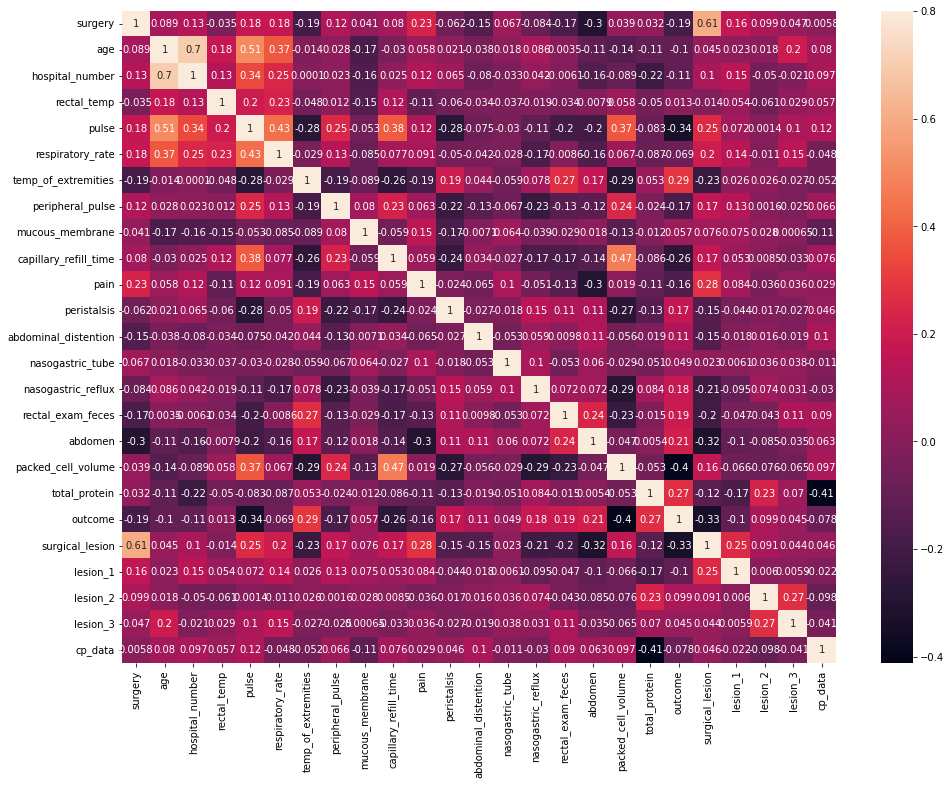

In [230]:
# Understanding the correlation between the features
train_corr = horse_data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(train_corr, vmax=0.8, annot=True)
corr_values=train_corr['outcome'].sort_values(ascending=False)
corr_values=abs(corr_values).sort_values(ascending=False)
print("Correlation of mentioned features wrt outcome in ascending order")
print(abs(corr_values).sort_values(ascending=False))

This shows that features like pulse, surgical lesion,packed cell volume are having strong relations with our target variable which implies that these features play the most crucial role in classifying the target variable compared to other features.

In [231]:
print("Data Size Before Correlated Column Removal :",horse_data.shape)
for col in range(len(corr_values)):
    if abs(corr_values[col]) < 0.1:
        horse_data=horse_data.drop([corr_values.index[col]], axis=1)
        print(corr_values.index[col],"removed")
print("Data Size After Correlated Column Removal :",horse_data.shape)

Data Size Before Correlated Column Removal : (299, 25)
lesion_2 removed
cp_data removed
respiratory_rate removed
mucous_membrane removed
nasogastric_tube removed
lesion_3 removed
rectal_temp removed
Data Size After Correlated Column Removal : (299, 18)


In [232]:
from sklearn.model_selection import train_test_split #import package to create the train and test dataset
from sklearn.linear_model import LogisticRegression #import package to perform Logistic Regression
from sklearn.ensemble import RandomForestClassifier #import package to perform Random Forest
from sklearn.metrics import precision_score, recall_score, f1_score #import metrics score to validate algorithms
import sys
from sklearn.preprocessing import StandardScaler #import the module to perform standardization
from sklearn.metrics import confusion_matrix as CM #import the confusion matrix package to evaluate classification performance
from sklearn.model_selection import learning_curve #import learning curve module
import random
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [233]:
# Separating the dependent and independent variables
y = horse_data['outcome']
horse_data.drop(['outcome'], axis=1, inplace=True)

In [234]:
X = horse_data

In [235]:
from sklearn.preprocessing import StandardScaler
# Scaling the dependent variables/features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

4. Data Partition (80% for training and 20% for testing)

In [236]:
# Splitting the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

5. Build the model and summarise and predict the dependent variable

In [237]:
#Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Train accuracy :", lr.score(X_train, y_train))
pred = lr.predict(X_test)

#Confusion Matrix for Random Forest
actual = y_test
predicted = pred
result = confusion_matrix(actual,predicted)
print ('Confusion Matrix :')
print(result) 
print('Test accuracy :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Train accuracy : 0.7531380753138075
Confusion Matrix :
[[ 9  1  7]
 [ 0  3  6]
 [ 7  0 27]]
Test accuracy : 0.65
Report : 
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        17
           1       0.75      0.33      0.46         9
           2       0.68      0.79      0.73        34

    accuracy                           0.65        60
   macro avg       0.66      0.55      0.58        60
weighted avg       0.65      0.65      0.64        60



In [238]:
#Decision tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Train accuracy :", dt.score(X_train, y_train))
pred = dt.predict(X_test)

#Confusion Matrix for DecisionTreeClassifier
actual = y_test
predicted = pred
result = confusion_matrix(actual,predicted)
print ('Confusion Matrix :')
print(result) 
print('Test accuracy :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Train accuracy : 1.0
Confusion Matrix :
[[ 8  2  7]
 [ 0  4  5]
 [ 6  2 26]]
Test accuracy : 0.6333333333333333
Report : 
              precision    recall  f1-score   support

           0       0.57      0.47      0.52        17
           1       0.50      0.44      0.47         9
           2       0.68      0.76      0.72        34

    accuracy                           0.63        60
   macro avg       0.59      0.56      0.57        60
weighted avg       0.62      0.63      0.63        60



In [239]:
#Random Forest Classifier Model
from sklearn.tree import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Train accuracy :", rf.score(X_train, y_train))
pred = rf.predict(X_test)

#Confusion Matrix for Random Forest
actual = y_test
predicted = pred
result = confusion_matrix(actual,predicted)
print ('Confusion Matrix :')
print(result) 
print('Test accuracy :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Train accuracy : 1.0
Confusion Matrix :
[[ 8  3  6]
 [ 0  4  5]
 [ 6  3 25]]
Test accuracy : 0.6166666666666667
Report : 
              precision    recall  f1-score   support

           0       0.57      0.47      0.52        17
           1       0.40      0.44      0.42         9
           2       0.69      0.74      0.71        34

    accuracy                           0.62        60
   macro avg       0.56      0.55      0.55        60
weighted avg       0.62      0.62      0.61        60



6. Tuning the model

In [240]:
from sklearn.model_selection import GridSearchCV

In [241]:
np.logspace(-4, 4, 50)

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

In [251]:
#GridSearchCV for finding better hyperparameters for logistic regression model
param_grid = {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 50),
    'solver' : ['liblinear']},
clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=0, n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=1.2067926406393288, penalty='l1', solver='liblinear')
The mean accuracy of the model is: 0.65


In [243]:
#GridSearchCV for finding better hyperparameters for random forest model
grid_param= {'n_estimators':[150, 180, 200,300,500],
             'min_samples_split':[2,4,6],
             'min_samples_leaf': [1,2,3,4],
             'max_features': [0.5, 'auto'],
             'max_depth': [10,15,20],
             'criterion': ['entropy'],
             'bootstrap': [True]}

In [244]:
grid_search =  GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_param, cv = 3, n_jobs = -1, verbose = 2)
best_model = grid_search.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=500)
The mean accuracy of the model is: 0.65


7. Evaluating the model using the metrics like accuracy, Precision, Recall, Receiver operating characteristics curve

In [245]:
#Best Random Forest Classifier Model

pred = best_model.predict(X_test)

#Confusion Matrix for Random Forest
actual = y_test
predicted = pred
result = confusion_matrix(actual,predicted)
print ('Confusion Matrix :')
print(result) 
print('Test accuracy :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Confusion Matrix :
[[ 8  1  8]
 [ 0  2  7]
 [ 5  0 29]]
Test accuracy : 0.65
Report : 
              precision    recall  f1-score   support

           0       0.62      0.47      0.53        17
           1       0.67      0.22      0.33         9
           2       0.66      0.85      0.74        34

    accuracy                           0.65        60
   macro avg       0.65      0.52      0.54        60
weighted avg       0.65      0.65      0.62        60



In [246]:
!pip install scikit-plot
import scikitplot as skplt

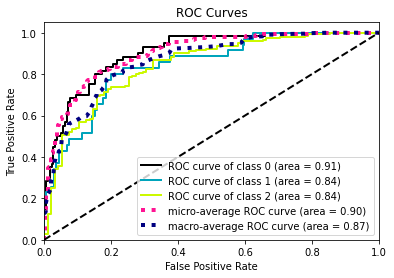

In [247]:
# printing ROC curve for Logistic Regression model
logit_scores_proba = lr.predict_proba(X_train)
skplt.metrics.plot_roc(y_train, logit_scores_proba)
plt.show()

### Conclusion -

Through this experiment I gained a deeper understanding about how to carry out exploratory data anaylsis. How can we fill the various types of missing values and evaluate the linear and logistic regression models respectively.